# SAT & ACT Analysis

## Problem Statement

There has been a change several changes in the participation rates in both the SAT and ACT exams between years 2017 and 2018. This report seeks to explore the reasons for the these changes within the U.S categorized by states. The report also aims to make recommendations to the College Board for strategies to improve participation rates in Ohio.

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

In [103]:
#Imports:
import numpy as np
import pandas as pd
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

## 2017 Data Import and Cleaning

#### Read In SAT & ACT  Data

In [104]:
sat_2017 = pd.read_csv("../data/sat_2017.csv")
act_2017 = pd.read_csv("../data/act_2017.csv")

#### Display Data

In [105]:
display(act_2017.head(10))
display(sat_2017.head(10))

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [106]:
#one extra row that is available in the act2017 dataset
act_2017['State'].isin(sat_2017['State']).value_counts()

True     51
False     1
Name: State, dtype: int64

In [107]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [108]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


#### Data Description


Based on the data, both data sets include state score averages. sat_2017 includes State, Participation Rate, individual scores for evidence-based reading and writing & math and also the total score of both these two tests.

act_2017 includes States, Participation rate, scores for english, math, reading, science and the composite score which is the rounded average of all the 4 test scores.

Looking at the info for each of the dataset, act_2017 has 52 rows while sat_2017 has 51. It is observed that sat_2017 does not have the national average score included. Otherwise, all the rows in both the dataset include non-null values (no missing values).

For SAT, the score range for Evidence-Based Reading and Writing and Math is 200-800 each. The score range for total test score is between 400-1600. <br>
https://collegereadiness.collegeboard.org/sat/scores/understanding-scores/structure <br>
For ACT, the 4 tests (English, Math, Reading, Science) are scaled to a score between 1 and 36 each.
The composite score is computed by taking the average of total scaled score of the 4 test, rounded to the nearest whole number and the range is from 1 (low) to 36 (high). <br>
https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html

#### Data Types

In [109]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [110]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

Participation should be a float as the value is indicated as a percentage and composite should be an int type as it is calculated by rounding off the average of the scores.

#### Fix Incorrect Data Types

In [111]:
#converting the "composite" column of act_2017 to numeric values
act_2017["Composite"] = pd.to_numeric(act_2017["Composite"])

ValueError: Unable to parse string "20.2x" at position 51

There was an error when we tried to convert the act_2017["Composite"] column to an int or float type. This is due to one of the values containing an alphabet "x" in it.

In [112]:
act_2017[act_2017.loc[:,"Composite"] == "20.2x"]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [113]:
act_2017.iloc[51,6] = round(np.mean(act_2017.iloc[51,2:6]),1)
act_2017.tail(1)

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


In [114]:
act_2017["Composite"] = pd.to_numeric(act_2017["Composite"])

In [115]:
act_2017["Participation"] = act_2017["Participation"]\
.apply(lambda x: float(str(x).replace("%","")) if "%" in x else None)

sat_2017["Participation"] = sat_2017["Participation"]\
.apply(lambda x: float(str(x).replace("%","")) if "%" in x else None)

In [116]:
#updated data types
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [117]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### Check integrity of column values

In [118]:
#check if ACT participation column is between 0 and 100 inclusive
act_2017["Participation"].between(0,100, inclusive=True).value_counts()
#check if ACT english, math, reading, science scores are between 1 and 36 inclusive
act_2017[(act_2017['English'].between(1,36,inclusive = True)) & 
         (act_2017['Math'].between(1,36,inclusive = True)) & 
         (act_2017['Reading'].between(1,36,inclusive = True)) &
         (act_2017['Science'].between(1,36,inclusive = True))].count()

#check for outliers
print("{} Test Score: Min: {}, Max: {} "
      .format("English",act_2017["English"].min(),act_2017["English"].max()))
print("{} Test Score: Min: {}, Max: {} "
      .format("Math",act_2017["Math"].min(),act_2017["Math"].max()))
print("{} Test Score: Min: {}, Max: {} "
      .format("Reading",act_2017["Reading"].min(),act_2017["Reading"].max()))
print("{} Test Score: Min: {}, Max: {} "
      .format("Science",act_2017["Science"].min(),act_2017["Science"].max()))

English Test Score: Min: 16.3, Max: 25.5 
Math Test Score: Min: 18.0, Max: 25.3 
Reading Test Score: Min: 18.1, Max: 26.0 
Science Test Score: Min: 2.3, Max: 24.9 


In [119]:
#min science test score is 2.3 which is most likely wrong. 
act_2017[act_2017["Science"] == 2.3]
#take the composite value to get the correct science score value
act_2017.iloc[21,5] = (act_2017.iloc[21,6] * 4) - np.sum(act_2017.iloc[21,2:5])
act_2017.iloc[21]

State            Maryland
Participation          28
English              23.3
Math                 23.1
Reading              24.2
Science              23.8
Composite            23.6
Name: 21, dtype: object

In [120]:
act_2017["Composite"] = round(act_2017["Composite"]).astype(int)

In [121]:
#check if SAT participation column is between 0 and 100 inclusive
sat_2017["Participation"].between(0,100, inclusive=True).value_counts()
#check if SAT Evidence-Based Reading and Writing & Math are between 200 and 800 inclusive
sat_2017[~(sat_2017['Evidence-Based Reading and Writing'].between(200,800,inclusive = True)) | 
         ~(sat_2017['Math'].between(200,800,inclusive = True))]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69.0,536,52,1060


In [122]:
#update wrong value in SAT dataset, index row 20
sat_2017.iloc[20,3] = sat_2017.iloc[20,4] - sat_2017.iloc[20,2]
sat_2017[sat_2017["State"] == "Maryland"]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69.0,536,524,1060


##### Check if ACT 2017 "Composite" column values are correct by comparing it with the mean of English, Math, Reading, Science

In [123]:
act_2017["composite_check"] = round(np.mean(act_2017.iloc[:,2:6], axis = 1)).astype(int)
display(act_2017)
#composites that does not match the mean values of the test scores
display(act_2017[act_2017["Composite"] != act_2017["composite_check"]])

,State,Participation,English,Math,Reading,Science,Composite,composite_check
0,National,60.0,20.3,20.7,21.4,21.0,21,21
1,Alabama,100.0,18.9,18.4,19.7,19.4,19,19
2,Alaska,65.0,18.7,19.8,20.4,19.9,20,20
3,Arizona,62.0,18.6,19.8,20.1,19.8,20,20
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19,19
5,California,31.0,22.5,22.7,23.1,22.2,23,23
6,Colorado,100.0,20.1,20.3,21.2,20.9,21,21
7,Connecticut,31.0,25.5,24.6,25.6,24.6,25,25
8,Delaware,18.0,24.1,23.4,24.8,23.6,24,24
9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24,24


,State,Participation,English,Math,Reading,Science,Composite,composite_check
15,Indiana,35.0,22.0,22.4,23.2,22.3,23,22
19,Louisiana,100.0,19.4,18.8,19.8,19.6,20,19
24,Minnesota,100.0,20.4,21.5,21.8,21.6,22,21
25,Mississippi,100.0,18.2,18.1,18.8,18.8,19,18
30,New Hampshire,18.0,25.4,25.1,26.0,24.9,26,25


##### Check if SAT 2017 "Total" column values are correct by comparing it with the total of Evidence-based reading and writing and Math

In [124]:
sat_2017["total_check"] = np.sum(sat_2017.iloc[:,2:4], axis = 1).astype(int)
display(sat_2017)

#totals that does not match the total values of the test scores
display(sat_2017[sat_2017["Total"] != sat_2017["total_check"]])

,State,Participation,Evidence-Based Reading and Writing,Math,Total,total_check
0,Alabama,5.0,593,572,1165,1165
1,Alaska,38.0,547,533,1080,1080
2,Arizona,30.0,563,553,1116,1116
3,Arkansas,3.0,614,594,1208,1208
4,California,53.0,531,524,1055,1055
5,Colorado,11.0,606,595,1201,1201
6,Connecticut,100.0,530,512,1041,1042
7,Delaware,100.0,503,492,996,995
8,District of Columbia,100.0,482,468,950,950
9,Florida,83.0,520,497,1017,1017


,State,Participation,Evidence-Based Reading and Writing,Math,Total,total_check
6,Connecticut,100.0,530,512,1041,1042
7,Delaware,100.0,503,492,996,995
12,Idaho,93.0,513,493,1005,1006
15,Iowa,2.0,641,635,1275,1276
18,Louisiana,4.0,611,586,1198,1197
21,Massachusetts,76.0,555,551,1107,1106
22,Michigan,100.0,509,495,1005,1004
24,Mississippi,2.0,634,607,1242,1241
27,Nebraska,3.0,629,625,1253,1254
32,New York,67.0,528,523,1052,1051


#### Update the correct "Composite" and "Total" Values

In [125]:
act_2017.drop(columns = "Composite", axis=1, inplace=True)
act_2017.rename(columns={'composite_check': 'Composite'}, inplace=True)

sat_2017.drop(columns = "Total", axis =1, inplace = True)
sat_2017.rename(columns={"total_check":"Total"}, inplace=True)

#### Rename Columns

In [126]:
act_columns_2017 = {"State": "state",
                    "Participation": "act_participation2017",
                    "English": "act_english2017",
                    "Math": "act_math2017",
                    "Reading": "act_reading2017",
                    "Science": "act_science2017",
                    "Composite": "act_composite2017"}
act_2017.columns = act_2017.columns.map(act_columns_2017)

In [127]:
act_2017.head(0)

,state,act_participation2017,act_english2017,act_math2017,act_reading2017,act_science2017,act_composite2017


In [129]:
sat_columns_2017 = {"State":"state",
                    "Participation": "sat_participation2017",
                    "Evidence-Based Reading and Writing": "sat_erw2017",
                    "Math": "sat_math2017",
                    "Total": "sat_total2017"}
sat_2017.columns = sat_2017.columns.map(sat_columns_2017)

In [130]:
sat_2017.head(0)

,state,sat_participation2017,sat_erw2017,sat_math2017,sat_total2017


#### Data dictionary for 2017 ACT & SAT

|Feature|Type|Dataset|Description|Data Range|
|---|---|---|---|---|
|**state**|*object*|2017 ACT/SAT|States in the USA|State Name|
|**act_participation2017**|*float*|2017 ACT|Mean Participation Rate for ACT in the respective state|0-100 (%)|
|**act_english2017**|*float*|2017 ACT|Mean English score in the ACT|1-36|
|**act_math2017**|*float*|2017 ACT|Mean Math score in the ACT|1-36|
|**act_reading2017**|*float*|2017 ACT|Mean Reading score in the ACT|1-36|
|**act_science2017**|*float*|2017 ACT|Mean Science score in the ACT|1-36|
|**act_composite2017**|*int*|2017 ACT|Average score of English, Math, Reading & Science|1-36|
|**sat_participation2017**|*float*|2017 SAT|Mean Participation Rate for SAT in the respective state|0-100 (%)|
|**sat_erw2017**|*int*|2017 SAT|Mean Evidence-Based Reading and Writing score in the SAT|200-800|
|**sat_math2017**|*int*|2017 SAT|Mean Math score in the SAT|200-800|
|**sat_total2017**|*int*|2017 SAT|Mean Total score of Evidence-Based Reading and Writing & Math|400-1600|


#### Drop unnecessary rows

In [131]:
#remove the top most row where "national" was the state
act_2017.drop(0, axis = 0, inplace = True)
display(act_2017.head(3))

,state,act_participation2017,act_english2017,act_math2017,act_reading2017,act_science2017,act_composite2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19
2,Alaska,65.0,18.7,19.8,20.4,19.9,20
3,Arizona,62.0,18.6,19.8,20.1,19.8,20


#### Merge 2017 ACT & SAT Dataframes

In [132]:
combined_2017 = pd.merge(act_2017, sat_2017, on="state")
display(combined_2017.head(5))

,state,act_participation2017,act_english2017,act_math2017,act_reading2017,act_science2017,act_composite2017,sat_participation2017,sat_erw2017,sat_math2017,sat_total2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,20,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,20,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,23,53.0,531,524,1055


#### Save merged dataframe

In [134]:
combined_2017.to_csv("../data/combined_2017.csv")

## 2018 Data Import and Cleaning

In [135]:
act_2018 = pd.read_csv("../data/act_2018_updated.csv")
display(act_2018.head(5))
sat_2018 = pd.read_csv("../data/sat_2018.csv")
display(sat_2018.head(5))

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [136]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [137]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


#### Fix Incorrect Data Types

In [138]:
#change SAT participation column to float type
sat_2018["Participation"] = sat_2018["Participation"]\
    .apply(lambda x: float(str(x.replace("%",""))) if "%" in x else None)
display(sat_2018.head(5))

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [139]:
act_2018["Percentage of Students Tested"] = act_2018["Percentage of Students Tested"]\
    .apply(lambda x: float(str(x).replace("%","")) if "%" in str(x) else float(x))
display(act_2018.head(5))

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1


#### Check integrity of column values

In [140]:
# check if all participation values are between 0 and 100
sat_2018["Participation"].between(0, 100, inclusive = True).value_counts()

#check if any values in the ERW and Math column is between the range of 200 to 800
sat_2018[~(sat_2018['Evidence-Based Reading and Writing'].between(200,800,inclusive = True)) | 
         ~(sat_2018['Math'].between(200,800,inclusive = True))]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [141]:
sat_2018["total_check"] = np.sum(sat_2018.iloc[:,2:4], axis = 1)
#show rows where Total is not equal to total_check
display(sat_2018[sat_2018["Total"] != sat_2018["total_check"]])

,State,Participation,Evidence-Based Reading and Writing,Math,Total,total_check
3,Arkansas,5.0,592,576,1169,1168
6,Connecticut,100.0,535,519,1053,1054
7,Delaware,100.0,505,492,998,997
16,Kansas,4.0,633,631,1265,1264
22,Michigan,100.0,511,499,1011,1010
31,New Mexico,16.0,552,540,1093,1092
33,North Carolina,52.0,554,543,1098,1097
45,Vermont,64.0,565,554,1120,1119
50,Wyoming,3.0,633,625,1257,1258


In [142]:
sat_2018.drop(columns = {"Total"}, inplace=True)
sat_2018.rename(columns = {"total_check":"Total"}, inplace = True)

In [143]:
# check if all participation values are between 0 and 100
act_2018["Percentage of Students Tested"].between(0, 100, inclusive = True).value_counts()
#check if ACT english, math, reading, science scores are between 1 and 36 inclusive
act_2018[(act_2018["Average English Score"].between(1,36, inclusive = True)) &
         (act_2018["Average Math Score"].between(1,36, inclusive = True)) &
         (act_2018["Average Reading Score"].between(1,36, inclusive = True)) &
         (act_2018["Average Science Score"].between(1,36, inclusive = True))].count()
#no incorrect values found in any of the 51 rows

#check for outliers
print("{} Test Score: Min: {}, Max: {} "
      .format("Average English Score",act_2018["Average English Score"].min(),act_2018["Average English Score"].max()))
print("{} Test Score: Min: {}, Max: {} "
      .format("Average Math Score",act_2018["Average Math Score"].min(),act_2018["Average Math Score"].max()))
print("{} Test Score: Min: {}, Max: {} "
      .format("Average Reading Score",act_2018["Average Reading Score"].min(),act_2018["Average Reading Score"].max()))
print("{} Test Score: Min: {}, Max: {} "
      .format("Average Science Score",act_2018["Average Science Score"].min(),act_2018["Average Science Score"].max()))

Average English Score Test Score: Min: 16.6, Max: 26.0 
Average Math Score Test Score: Min: 17.8, Max: 25.2 
Average Reading Score Test Score: Min: 18.0, Max: 26.1 
Average Science Score Test Score: Min: 17.9, Max: 24.9 


In [144]:
act_2018["Average Composite Score"] = round(act_2018["Average Composite Score"]).astype(int)
#check for correct values of average composite score
act_2018["composite_check"] = round(np.mean(act_2018.iloc[:,3:7], axis = 1)).astype(int)

In [145]:
#show rows where Average Composite Score is not equal to composite_check
act_2018[act_2018["Average Composite Score"] != act_2018["composite_check"]]

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score,composite_check
6,Connecticut,26.0,26,26.0,24.8,26.1,24.9,25
7,Delaware,17.0,23,23.7,23.1,24.5,23.4,24
8,District of Columbia,32.0,24,23.7,22.7,24.4,23.0,23
16,Kansas,71.0,22,21.0,21.1,22.3,21.5,21
21,Massachusetts,25.0,26,25.5,25.2,25.9,24.7,25
24,Mississippi,100.0,19,18.2,18.1,18.9,18.6,18
38,Pennsylvania,20.0,24,23.3,23.2,24.0,23.1,23


In [146]:
act_2018.drop(columns = "Average Composite Score", inplace = True)
act_2018.rename(columns = {"composite_check":"Average Composite Score"}, inplace = True)

#### Rename Columns

In [147]:
act_2018_columns = {
                "State":"state",
                "Percentage of Students Tested":"act_participation2018",
                "Average English Score":"act_english2018",
                "Average Math Score":"act_math2018",
                "Average Reading Score":"act_reading2018",
                "Average Science Score":"act_science2018",
                "Average Composite Score":"act_composite2018"}
act_2018.columns = act_2018.columns.map(act_2018_columns)
display(act_2018.head(0))

,state,act_participation2018,act_english2018,act_math2018,act_reading2018,act_science2018,act_composite2018


In [148]:
sat_columns_2018 = {"State":"state",
                    "Participation": "sat_participation2018",
                    "Evidence-Based Reading and Writing": "sat_erw2018",
                    "Math": "sat_math2018",
                    "Total": "sat_total2018"}
sat_2018.columns = sat_2018.columns.map(sat_columns_2018)
display(sat_2018.head(0))

,state,sat_participation2018,sat_erw2018,sat_math2018,sat_total2018


#### Data Dictionary for 2018 ACT & SAT

|Feature|Type|Dataset|Description|Data Range|
|---|---|---|---|--|
|**state**|*object*|2018 ACT/SAT|States in the USA|State Name|
|**act_participation2018**|*float*|2018 ACT|Mean Participation Rate for ACT in the respective state|0-100 (%)
|**act_english2018**|*float*|2018 ACT|Mean English score in the ACT|1-36|
|**act_math2018**|*float*|2018 ACT|Mean Math score in the ACT|1-36|
|**act_reading2018**|*float*|2018 ACT|Mean Reading score in the ACT|1-36|
|**act_science2018**|*float*|2018 ACT|Mean Science score in the ACT|1-36|
|**act_composite2018**|*int*|2018 ACT|Average score of English, Math, Reading & Science|1-36|
|**sat_participation2018**|*float*|2018 SAT|Mean Participation Rate for SAT in the respective state|0-100 (%)
|**sat_erw2018**|*int*|2018 SAT|Mean Evidence-Based Reading and Writing score in the SAT|200-800|
|**sat_math2018**|*int*|2018 SAT|Mean Math score in the SAT|200-800|
|**sat_total2018**|*int*|2018 SAT|Mean Total score of Evidence-Based Reading and Writing & Math|400-1600|


#### Combine 2017 and 2018 data into a single dataframe

In [149]:
combined_2018 = pd.merge(act_2018, sat_2018, on="state")
combined_2018.to_csv("../data/combined_2018.csv")

In [151]:
final = pd.merge(combined_2017, combined_2018, on = "state")
final.to_csv("../data/final.csv")

In [152]:
display(final.head(0))

,state,act_participation2017,act_english2017,act_math2017,act_reading2017,act_science2017,act_composite2017,sat_participation2017,sat_erw2017,sat_math2017,...,act_participation2018,act_english2018,act_math2018,act_reading2018,act_science2018,act_composite2018,sat_participation2018,sat_erw2018,sat_math2018,sat_total2018


## Exploratory Data Analysis


### Summary Statistics

In [153]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science2017,51.0,21.462745,1.753392,18.2,19.95,21.3,23.20,24.9
act_composite2017,51.0,21.431373,2.042106,18.0,20.00,21.0,24.00,25.0
sat_participation2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_erw2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total2017,51.0,1126.000000,92.487621,950.0,1055.50,1106.0,1211.50,1295.0


In [154]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
state                    51 non-null object
act_participation2017    51 non-null float64
act_english2017          51 non-null float64
act_math2017             51 non-null float64
act_reading2017          51 non-null float64
act_science2017          51 non-null float64
act_composite2017        51 non-null int32
sat_participation2017    51 non-null float64
sat_erw2017              51 non-null int64
sat_math2017             51 non-null int64
sat_total2017            51 non-null int32
act_participation2018    51 non-null float64
act_english2018          51 non-null float64
act_math2018             51 non-null float64
act_reading2018          51 non-null float64
act_science2018          51 non-null float64
act_composite2018        51 non-null int32
sat_participation2018    51 non-null float64
sat_erw2018              51 non-null int64
sat_math2018             51 non-null int64
sat_total201

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [801]:
def calculate_std(values):
    n = len(values)
    mean = np.mean(values)
    x = 0
    
    for i in values:
        x += (i-mean)**2
        variance = x/n
        std = variance**0.5
    return round(std,6) 

In [802]:
from pandas.api.types import is_numeric_dtype
sd = {column : calculate_std(final[column]) for 
      column in final.columns if is_numeric_dtype(final[column])}
sd

{'act_participation2017': 31.824176,
 'act_english2017': 2.330488,
 'act_math2017': 1.962462,
 'act_reading2017': 2.046903,
 'act_science2017': 1.736117,
 'act_composite2017': 2.021986,
 'sat_participation2017': 34.929071,
 'sat_erw2017': 45.21697,
 'sat_math2017': 46.657134,
 'sat_total2017': 91.57639,
 'act_participation2018': 33.745195,
 'act_english2018': 2.422254,
 'act_math2018': 2.015707,
 'act_reading2018': 2.145892,
 'act_science2018': 1.851689,
 'act_composite2018': 2.083235,
 'sat_participation2018': 36.946619,
 'sat_erw2018': 47.03461,
 'sat_math2018': 47.301946,
 'sat_total2018': 93.261144}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [803]:
np.std(final)

act_participation2017    31.824176
act_english2017           2.330488
act_math2017              1.962462
act_reading2017           2.046903
act_science2017           1.736117
act_composite2017         2.021986
sat_participation2017    34.929071
sat_erw2017              45.216970
sat_math2017             46.657134
sat_total2017            91.576390
act_participation2018    33.745195
act_english2018           2.422254
act_math2018              2.015707
act_reading2018           2.145892
act_science2018           1.851689
act_composite2018         2.083235
sat_participation2018    36.946619
sat_erw2018              47.034610
sat_math2018             47.301946
sat_total2018            93.261144
dtype: float64

The manually calculated standard deviations and the np.std method are exactly the same. However, both of them are slightly different from the standard deviation provided by the describe method. This is due to the default delta degrees of freedom.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [850]:
# states with highest and lowest participation rates for ACT 2017
highest_act2017 = final[(final["act_participation2017"] == final["act_participation2017"].max())]\
.loc[:,["state", "act_participation2017"]]
display(highest_act2017)
lowest_act2017 = final[(final["act_participation2017"] == final["act_participation2017"].min())]\
.loc[:,["state", "act_participation2017"]]
display(lowest_act2017)

,state,act_participation2017
0,Alabama,100.0
3,Arkansas,100.0
5,Colorado,100.0
17,Kentucky,100.0
18,Louisiana,100.0
23,Minnesota,100.0
24,Mississippi,100.0
25,Missouri,100.0
26,Montana,100.0
28,Nevada,100.0


,state,act_participation2017
19,Maine,8.0


In [155]:
# states with the highest and lowest partipation rate for ACT 2018
highest_act2018 = final[(final["act_participation2018"] == final["act_participation2018"].max())]\
.loc[:,["state", "act_participation2018"]]
display(highest_act2018)
lowest_act2018 = final[(final["act_participation2018"] == final["act_participation2018"].min())]\
.loc[:,["state", "act_participation2018"]]
display(lowest_act2018)

,state,act_participation2018
0,Alabama,100.0
3,Arkansas,100.0
17,Kentucky,100.0
18,Louisiana,100.0
24,Mississippi,100.0
25,Missouri,100.0
26,Montana,100.0
27,Nebraska,100.0
28,Nevada,100.0
33,North Carolina,100.0


,state,act_participation2018
19,Maine,7.0


In [156]:
# states with the highest and lowest partipation rate for SAT 2017
highest_sat2017 = final[(final["sat_participation2017"] == final["sat_participation2017"].max())]\
.loc[:,["state", "sat_participation2017"]]
display(highest_sat2017)
lowest_sat2017 = final[(final["sat_participation2017"] == final["sat_participation2017"].min())]\
.loc[:,["state", "sat_participation2017"]]
display(lowest_sat2017)

,state,sat_participation2017
6,Connecticut,100.0
7,Delaware,100.0
8,District of Columbia,100.0
22,Michigan,100.0


,state,sat_participation2017
15,Iowa,2.0
24,Mississippi,2.0
34,North Dakota,2.0


In [157]:
# states with the highest and lowest partipation rate for SAT 2018
highest_sat2018 = final[(final["sat_participation2018"] == final["sat_participation2018"].max())]\
.loc[:,["state", "sat_participation2018"]]
display(highest_sat2018)
lowest_sat2018 = final[(final["sat_participation2018"] == final["sat_participation2018"].min())]\
.loc[:,["state", "sat_participation2018"]]
display(lowest_sat2018)

,state,sat_participation2018
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
12,Idaho,100.0
22,Michigan,100.0


,state,sat_participation2018
34,North Dakota,2.0


In [160]:
# states with the highest and lowest mean composite score for ACT 2017
highest_act_score2017 = final[(final["act_composite2017"] == final["act_composite2017"].max())]\
.loc[:,["state", "act_composite2017"]]
display(highest_act_score2017)
lowest_act_score2017 = final[(final["act_composite2017"] == final["act_composite2017"].min())]\
.loc[:,["state", "act_composite2017"]]
display(lowest_act_score2017)

,state,act_composite2017
6,Connecticut,25
21,Massachusetts,25
29,New Hampshire,25


,state,act_composite2017
24,Mississippi,18
28,Nevada,18


In [161]:
# states with the highest and lowest mean composite score for ACT 2018
highest_act_score2018 = final[(final["act_composite2018"] == final["act_composite2018"].max())]\
.loc[:,["state", "act_composite2018"]]
display(highest_act_score2018)
lowest_act_score2018 = final[(final["act_composite2018"] == final["act_composite2018"].min())]\
.loc[:,["state", "act_composite2018"]]
display(lowest_act_score2018)

,state,act_composite2018
6,Connecticut,25
21,Massachusetts,25
29,New Hampshire,25


,state,act_composite2018
24,Mississippi,18
28,Nevada,18
40,South Carolina,18


In [158]:
# states with the highest and lowest mean total score for SAT 2017
highest_sat_score2017 = final[(final["sat_total2017"] == final["sat_total2017"].max())]\
.loc[:,["state", "sat_total2017"]]
display(highest_sat_score2017)
lowest_sat_score2017 = final[(final["sat_total2017"] == final["sat_total2017"].min())]\
.loc[:,["state", "sat_total2017"]]
display(lowest_sat_score2017)

,state,sat_total2017
23,Minnesota,1295


,state,sat_total2017
8,District of Columbia,950


In [159]:
# states with the highest and lowest mean total score for SAT 2018
highest_sat_score2018 = final[(final["sat_total2018"] == final["sat_total2018"].max())]\
.loc[:,["state", "sat_total2018"]]
display(highest_sat_score2018)
lowest_sat_score2018 = final[(final["sat_total2018"] == final["sat_total2018"].min())]\
.loc[:,["state", "sat_total2018"]]
display(lowest_sat_score2018)

,state,sat_total2018
23,Minnesota,1298


,state,sat_total2018
8,District of Columbia,977


In [166]:
# find states that dropped from a 100% participation rate for ACT
sorted_by_act = final.sort_values("act_participation2017", ascending = False)\
.loc[:,["state", "act_participation2017","act_participation2018"]]
rate_change_act = sorted_by_act[(sorted_by_act["act_participation2017"] == 100) & 
                            (sorted_by_act["act_participation2018"] < 100)]
display(rate_change_act)

,state,act_participation2017,act_participation2018
23,Minnesota,100.0,99.0
5,Colorado,100.0,30.0


In [167]:
# find states that dropped from a 100% participation rate for SAT
sorted_by_sat = final.sort_values("sat_participation2017", ascending = False)\
.loc[:,["state","sat_participation2017", "sat_participation2018"]]

rate_change_sat = sorted_by_sat[(sorted_by_sat["sat_participation2017"] == 100) & 
                            (sorted_by_sat["sat_participation2018"] < 100)]
display(rate_change_sat)

,state,sat_participation2017,sat_participation2018
8,District of Columbia,100.0,92.0


In [168]:
#states which have more than 50% participation rate for both the tests in both the years
more_than_50 = final[(final["act_participation2017"] > 50) & (final["act_participation2018"] > 50) &
     (final["sat_participation2017"] > 50) & (final["sat_participation2018"] > 50)]
columns = ["state", "act_participation2017","act_participation2018",
           "sat_participation2017","sat_participation2018" ]
display(more_than_50[columns])

,state,act_participation2017,act_participation2018,sat_participation2017,sat_participation2018
9,Florida,73.0,66.0,83.0,56.0
10,Georgia,55.0,53.0,61.0,70.0
11,Hawaii,90.0,89.0,55.0,56.0


In [171]:
more_than_50_sameyear = final[(final["act_participation2017"] > 50) & 
                              (final["sat_participation2017"] >50)]
columns = ["state","act_participation2017", "sat_participation2017"]
display(more_than_50_sameyear[columns])

,state,act_participation2017,sat_participation2017
9,Florida,73.0,83.0
10,Georgia,55.0,61.0
11,Hawaii,90.0,55.0


In [172]:
more_than_50_sameyear = final[(final["act_participation2018"] > 50) & 
                              (final["sat_participation2018"] >50)]
columns = ["state","act_participation2018", "sat_participation2018"]
display(more_than_50_sameyear[columns])

,state,act_participation2018,sat_participation2018
9,Florida,66.0,56.0
10,Georgia,53.0,70.0
11,Hawaii,89.0,56.0
33,North Carolina,100.0,52.0
40,South Carolina,100.0,55.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [860]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [153]:
# Code

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [154]:
# Code

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

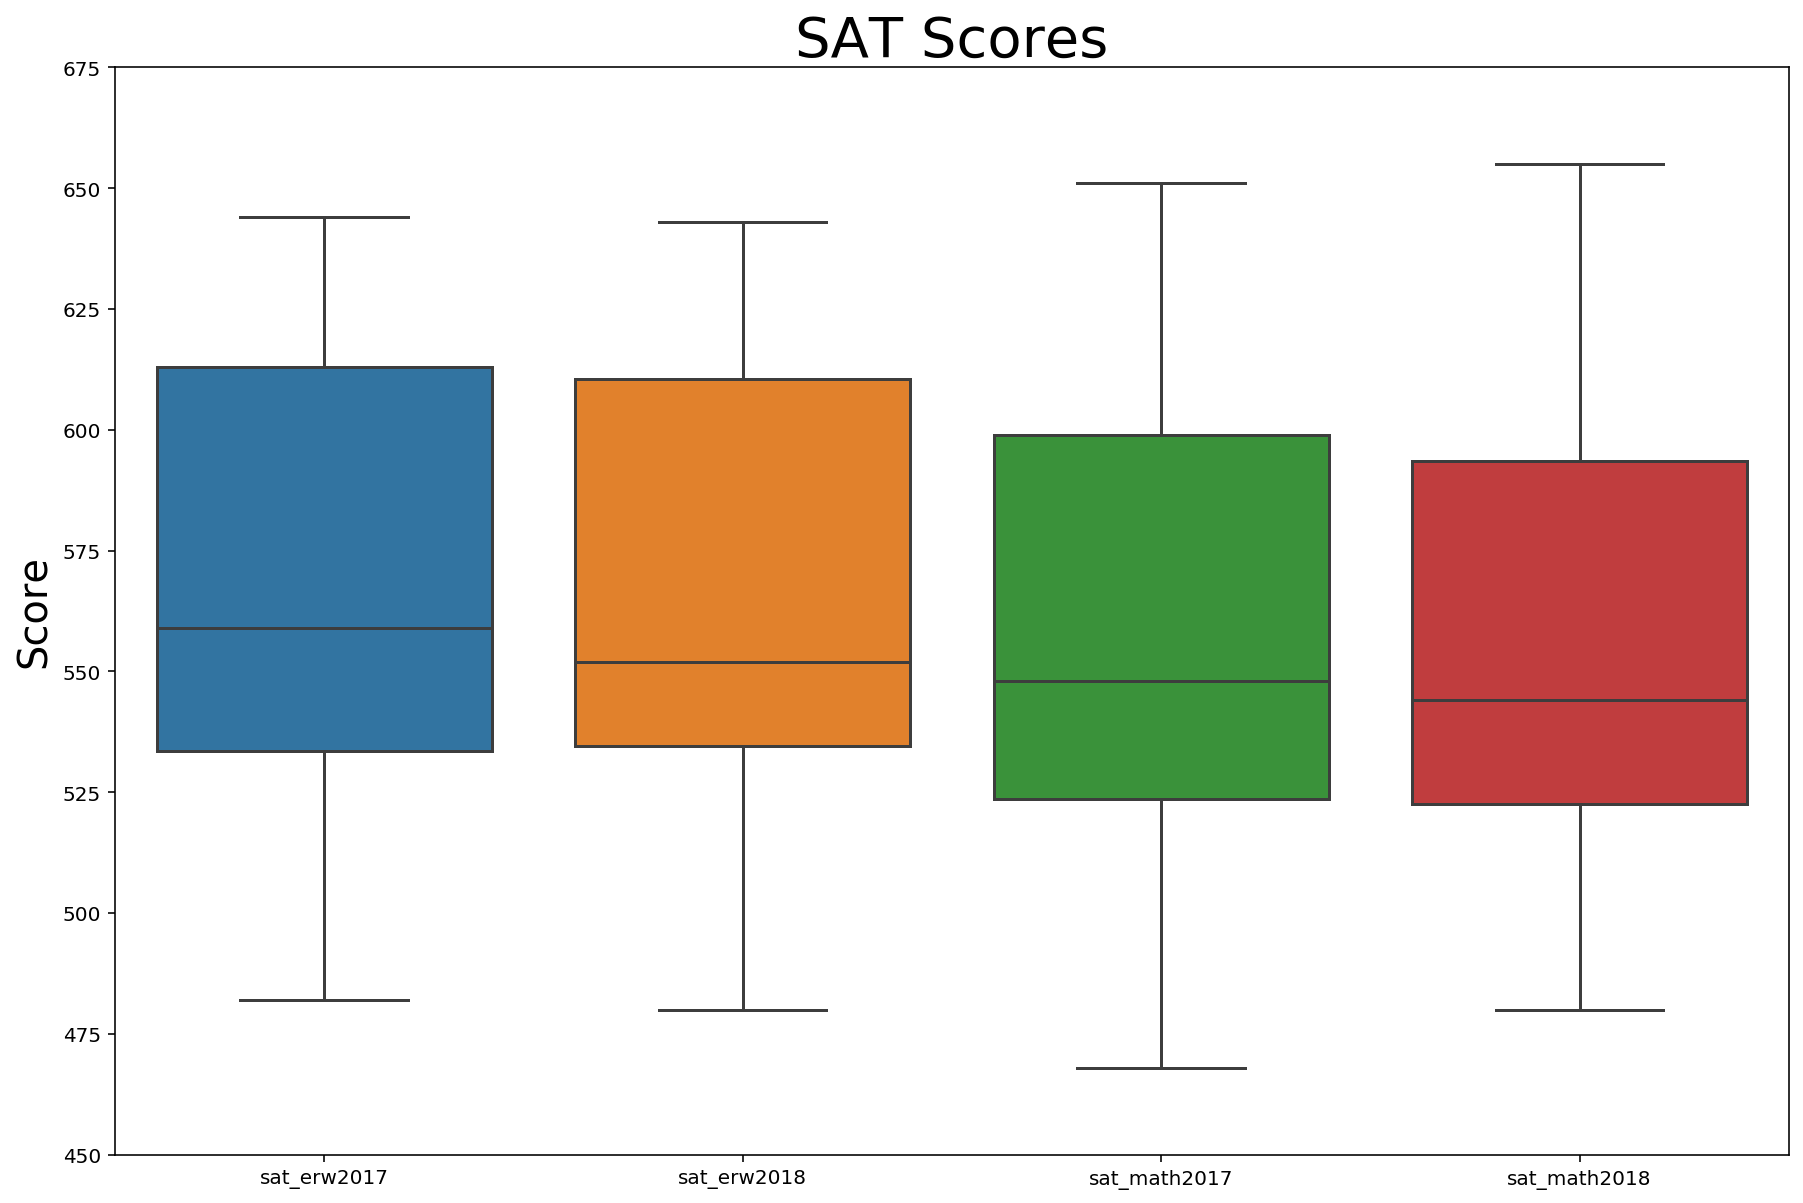

In [864]:
ax = plt.subplots(figsize=(15,10))
plt.title('SAT Scores',fontsize=28)
plt.ylabel('Score',fontsize=20)
plt.ylim(450, 675)
sns.boxplot(data=final[['sat_erw2017','sat_erw2018',
                        'sat_math2017','sat_math2018']],width=0.8)

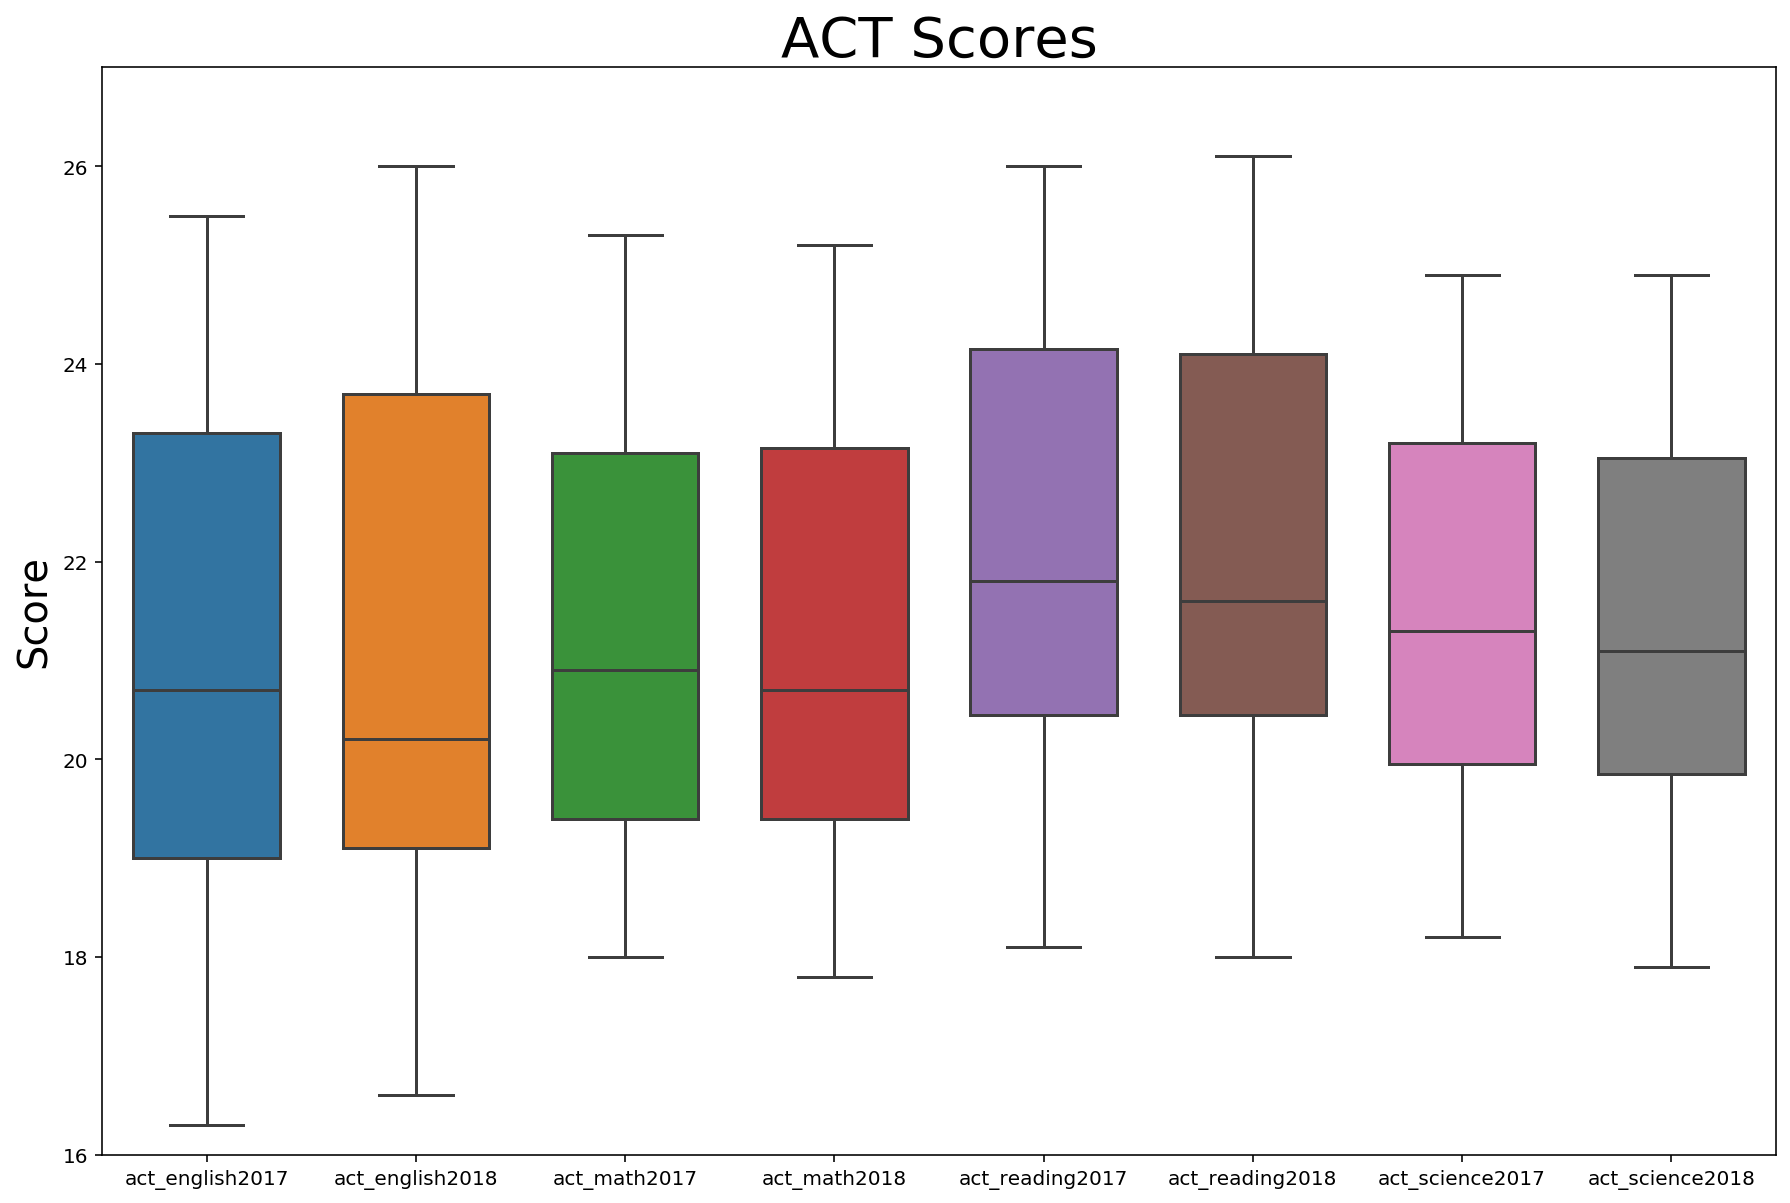

In [865]:
ax = plt.subplots(figsize=(15,10))
plt.title('ACT Scores',fontsize=28)
plt.ylabel('Score',fontsize=20)
plt.ylim(16, 27)

sns.boxplot(data=final[['act_english2017','act_english2018','act_math2017',
                        'act_math2018','act_reading2017','act_reading2018',
                        'act_science2017','act_science2018']],width=0.7)

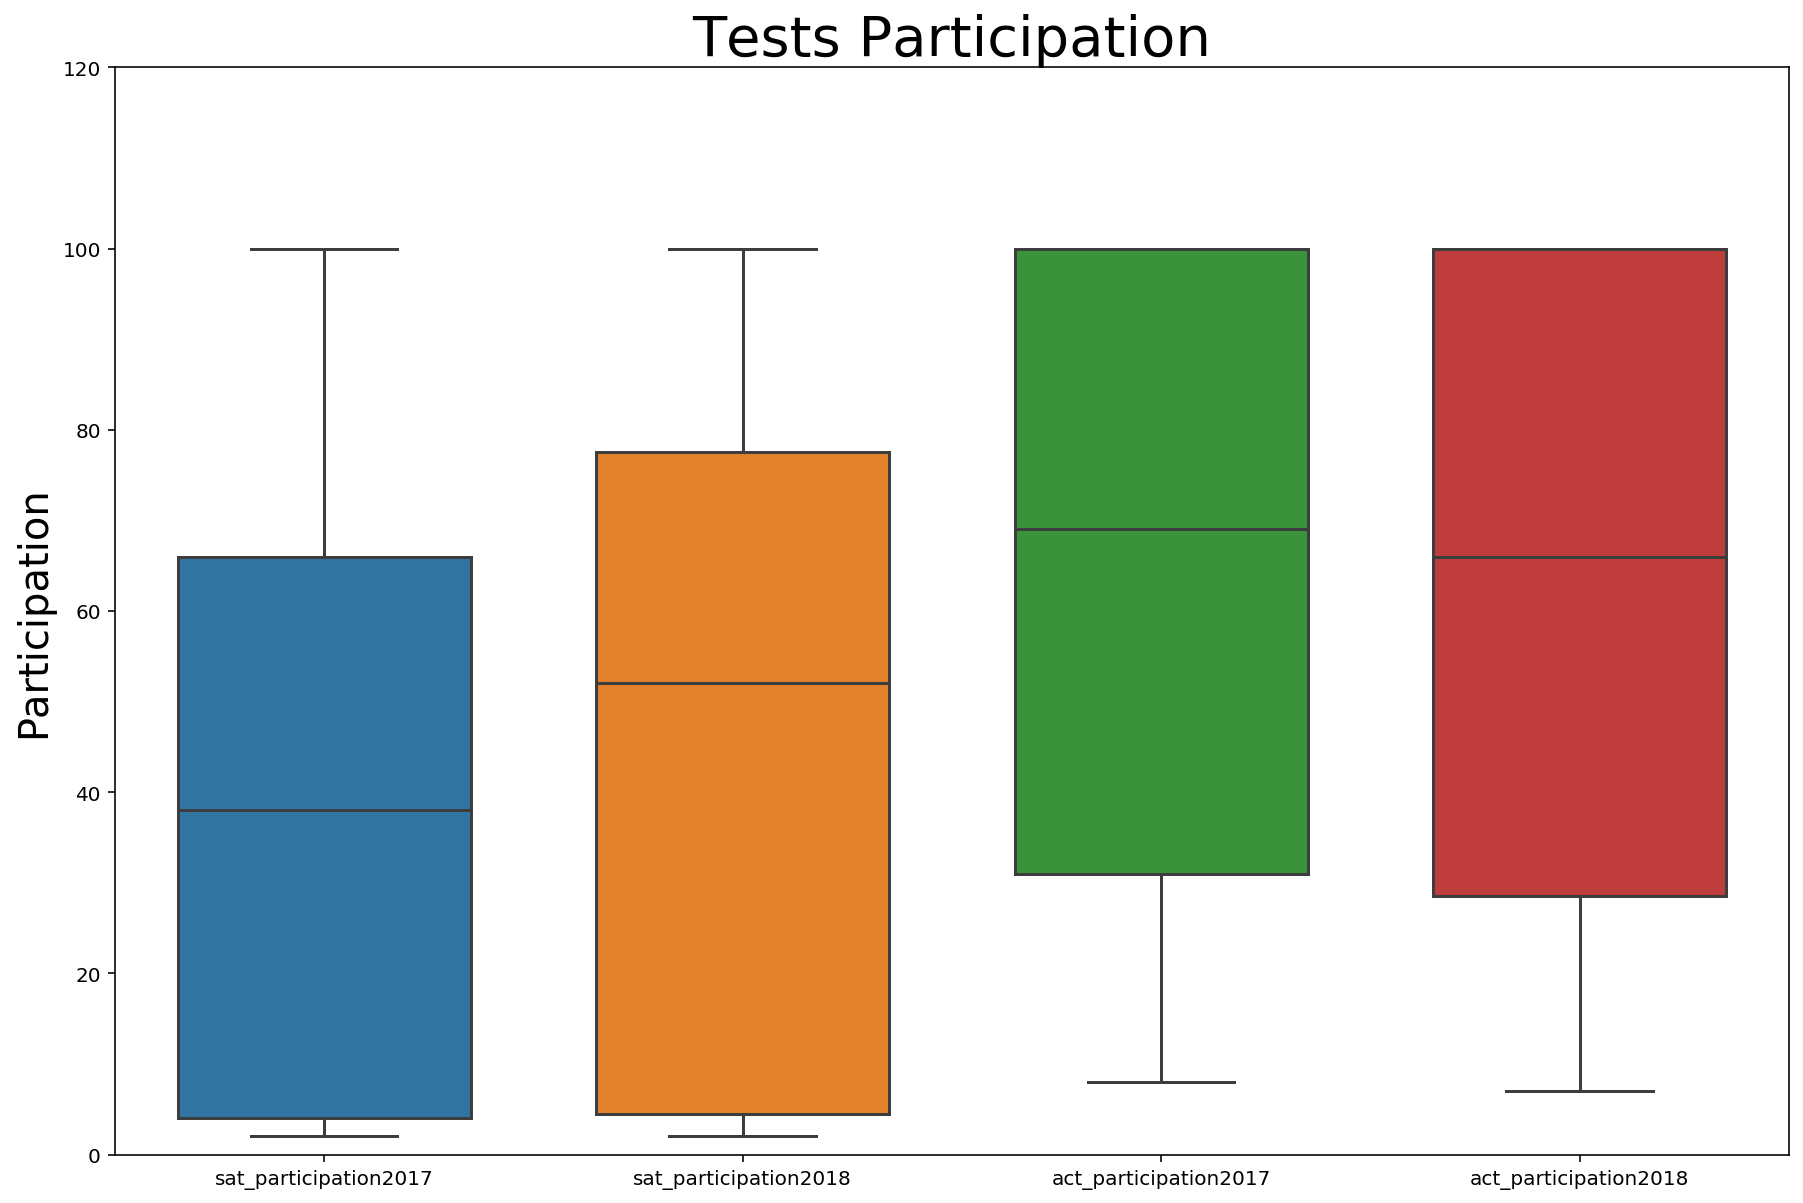

In [868]:
ax = plt.subplots(figsize=(15,10))
plt.title('Tests Participation',fontsize=28)
plt.ylabel('Participation',fontsize=20)
plt.ylim(0, 120)

sns.boxplot(data=final[['sat_participation2017','sat_participation2018',
                        'act_participation2017','act_participation2018']],width=0.7)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [156]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?